In [1]:
from SVDModel import SVDModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(3362)

In [2]:
# MovieLens Small
data_path_ml_small = './data/ml-latest-small/'
df_rating_ml_small = pd.read_csv(data_path_ml_small+'ratings.csv')
df_movies_ml_small = pd.read_csv(data_path_ml_small+'movies.csv')
m_movies_ml_small = df_movies_ml_small['movieId'].nunique()
n_users_ml_small = df_rating_ml_small['userId'].nunique()
n_ratings_ml_small = len(df_rating_ml_small)

df_movies_ml_small.insert(1, 'newMovieId', value=range(1,len(df_movies_ml_small)+1))
newMovieIdDict = {}
for index, movie in df_movies_ml_small.iterrows():
  newMovieIdDict[movie['movieId']] = movie['newMovieId']
df_rating_ml_small.replace({"movieId": newMovieIdDict}, inplace=True)
df_rating_ml_small['rating'] = df_rating_ml_small['rating'].astype(np.int64)

# print(df_rating_ml_small)
# print(df_movies_ml_small)
# print(n_users_ml_small)
# print(n_ratings_ml_small)
# print(m_movies_ml_small)

In [3]:
# Netflix Prize
data_path_netflix = './data/NetflixPrize/'
names = ['userId','rating','timestamp','movieId']
df_netflix = pd.read_csv(data_path_netflix+'data_1.txt', names=names, low_memory=False)
# df_netflix_2 = pd.read_csv(data_path_netflix+'data_2.txt', names=names, low_memory=False)
# df_netflix_3 = pd.read_csv(data_path_netflix+'data_3.txt', names=names, low_memory=False)
# df_netflix_4 = pd.read_csv(data_path_netflix+'data_4.txt', names=names, low_memory=False)
# df_netflix = pd.concat([df_netflix,df_netflix_2,df_netflix_3,df_netflix_4], names=names)
df_netflix['movieId'] = df_netflix['movieId'].fillna(method='ffill')
df_netflix = df_netflix.dropna()
df_netflix['rating'] = df_netflix['rating'].astype(np.int64)
df_netflix['movieId'] = df_netflix['movieId'].astype(np.int64)
df_netflix['userId'] = df_netflix['userId'].astype(np.int64)
df_netflix['timestamp'] = pd.to_datetime(df_netflix['timestamp']).view(dtype=np.int64) // 10 ** 9
# df_movies_netflix = pd.read_csv(data_path_netflix+'movie_titles.csv',encoding='latin-1',names=['movieId','release_year','title',])
m_movies_netflix = df_netflix['movieId'].nunique()
# m_movies_netflix = df_netflix['movieId'].max()
n_users_netflix = df_netflix['userId'].nunique()
# n_users_netflix = df_netflix['userId'].max()
n_ratings_netflix = len(df_netflix)
df_rating_netflix = df_netflix[['userId','movieId','rating','timestamp']].sample(10000)


# print(df_netflix_rating)
# print(df_netflix_movies)
# print(n_users_netflix)
# print(n_ratings_netflix)
# print(m_movies_netflix)

In [4]:
features = 3
lr = 0.001
epochs = 21
weight_decay = 0.02
stopping = 0.001

svd_ml_small = SVDModel(mode='svd++',features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)
svd_netflix = SVDModel(mode='svd++',features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)


In [5]:
svd_ml_small.data_loader(data=df_rating_ml_small, n_items = m_movies_ml_small, n_users=n_users_ml_small)
svd_ml_small.split(0.6,0.8)

User Item Matrix Shape: (610, 9724)
User Reference length: 610
Item Reference length: 9724


In [6]:
svd_netflix.data_loader(data=df_rating_netflix, n_items = m_movies_netflix, n_users=n_users_netflix)
svd_netflix.split(0.6,0.8)

User Item Matrix Shape: (9667, 1672)
User Reference length: 9667
Item Reference length: 1672


In [7]:
results_ml_small = svd_ml_small.training()

Epoch :    1  | Train : 0.962  | Valid : 0.971  | Time : 6.18790s
Epoch :   11  | Train : 0.792  | Valid : 0.828  | Time : 0.35914s
Epoch :   21  | Train : 0.747  | Valid : 0.799  | Time : 0.38375s
Training stopped:
Epoch :   21  | Train : 0.747  | Valid : 0.799


In [9]:
'''
Epoch :    1  | Train : 1.117  | Valid : 1.212  | Time : 13.38474s
Epoch :   11  | Train : 1.052  | Valid : 1.188  | Time : 229.19141s
Epoch :   21  | Train : 1.001  | Valid : 1.174  | Time : 133.69218s
Training stopped:
Epoch :   21  | Train : 1.001  | Valid : 1.174
'''
resuls_netflix = svd_netflix.training()

Epoch :    1  | Train : 1.117  | Valid : 1.212  | Time : 0.14904s
Epoch :   11  | Train : 1.052  | Valid : 1.188  | Time : 0.21458s
Epoch :   21  | Train : 1.001  | Valid : 1.174  | Time : 0.26008s
Training stopped:
Epoch :   21  | Train : 1.001  | Valid : 1.174


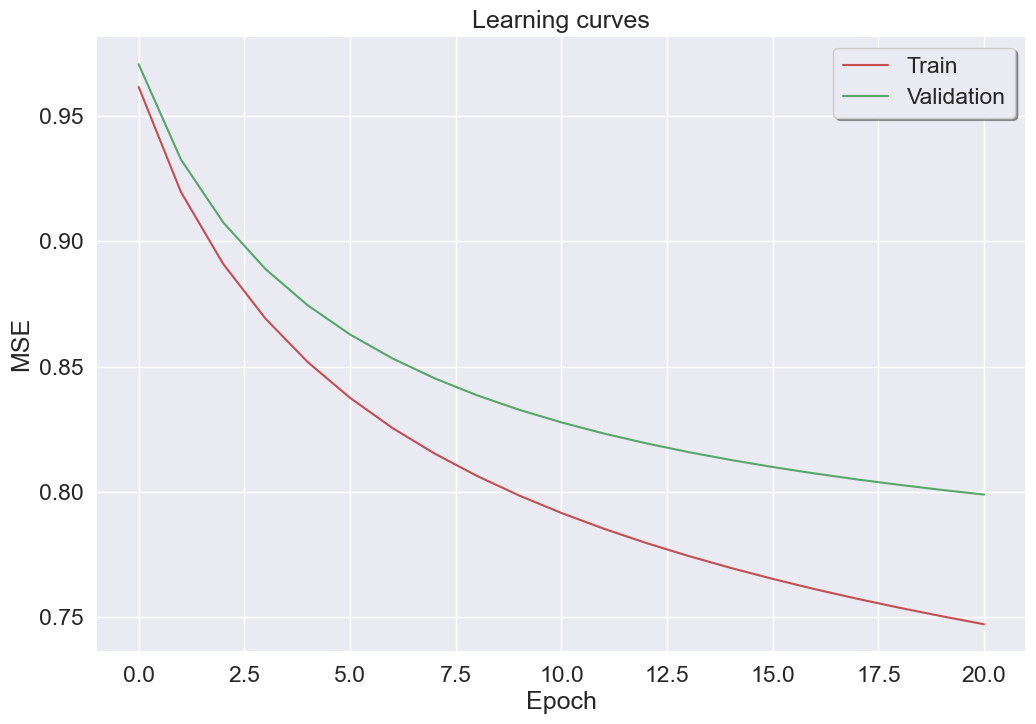

In [10]:
x = list(range(len(results_ml_small[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], results_ml_small[0][-k:], 'r', label="Train")
plt.plot(x[-k:], results_ml_small[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

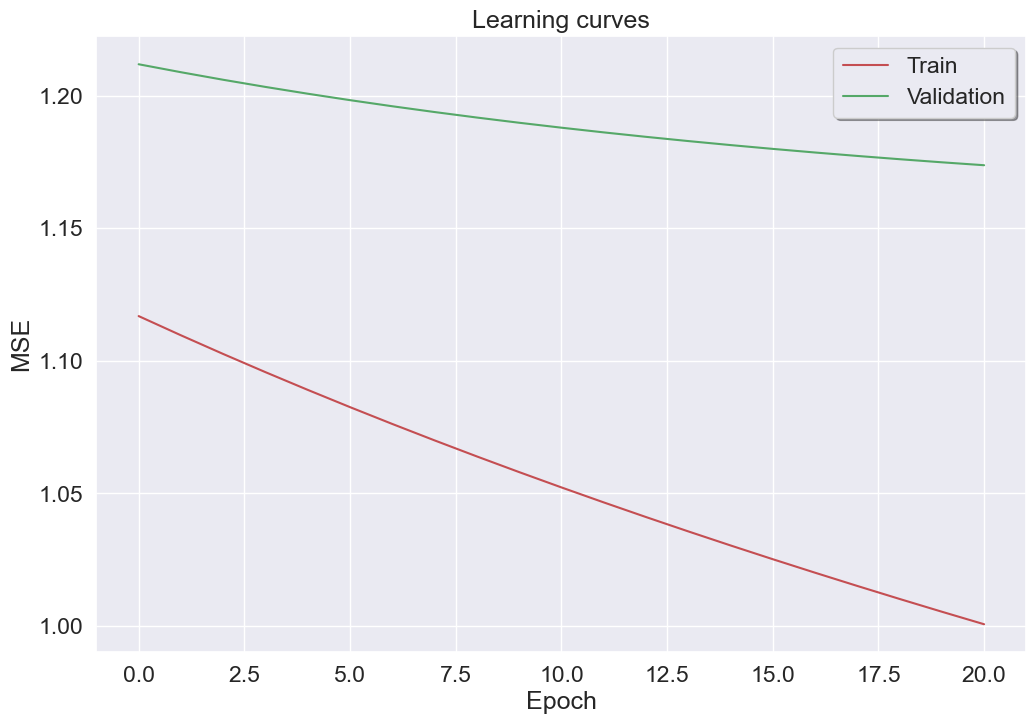

In [11]:
x = list(range(len(resuls_netflix[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], resuls_netflix[0][-k:], 'r', label="Train")
plt.plot(x[-k:], resuls_netflix[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

In [ ]:
# svd_ml_small.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100836 non-null  int64
 1   movieId    100836 non-null  int64
 2   rating     100836 non-null  int64
 3   timestamp  100836 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
# svd_netflix.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3910340 to 20649332
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   userId     10000 non-null  int64
 1   movieId    10000 non-null  int64
 2   rating     10000 non-null  int64
 3   timestamp  10000 non-null  int64
dtypes: int64(4)
memory usage: 390.6 KB


In [ ]:
# import pickle
# from pathlib import Path
# Path("./demo").mkdir(parents=True, exist_ok=True)
# with open(f'./demo/svdpp_ml_small.pkl', 'wb') as out:
#     pickle.dump(svd_ml_small, out, pickle.HIGHEST_PROTOCOL)
# with open(f'./demo/resultspp_svd_ml_small.pkl', 'wb') as out:
#     pickle.dump(results_ml_small, out, pickle.HIGHEST_PROTOCOL)

# with open(f'./demo/svdpp_ml_small.pkl', 'wb') as out:
#     pickle.dump(svd_netflix, out, pickle.HIGHEST_PROTOCOL)
# with open(f'./demo/resulspp_netflix.pkl', 'wb') as out:
#     pickle.dump(resuls_netflix, out, pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open('./demo/svd_ml_small.pkl', 'rb') as inp:
#     loaded_svd = pickle.load(inp)

In [ ]:
# loaded_svd._P

array([[0.02750944, 0.04816522, 0.00113131],
       [0.00436112, 0.0871369 , 0.07513554],
       [0.02347297, 0.05505393, 0.09293845],
       ...,
       [0.0125388 , 0.00043309, 0.05893123],
       [0.09034759, 0.00944114, 0.02319743],
       [0.00552947, 0.04693206, 0.04662669]])

In [ ]:
# svd_ml_small._P

array([[ 0.06599811,  0.07618405,  0.06744319],
       [ 0.10170663,  0.07093621,  0.09336086],
       [ 0.0811769 ,  0.02789992,  0.07086447],
       ...,
       [ 0.00149085,  0.054462  , -0.00141061],
       [ 0.05116836,  0.0935457 ,  0.04540038],
       [ 0.10729888,  0.09260079,  0.05674767]])